### Aim

The aim of this lab is to learn the Watts-Strogatz model of a random network.

### Objectives

At the end of this lab, students should be able to:
1. Generate Watts-Strogatz graphs from an adjacency matrix and directly
2. Evaluate whether the Watts-Strogatz random network is a suitable model for a real network

In [1]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import itertools as it
import random

from matplotlib.animation import FuncAnimation
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets


# Watts-Strogatz model

The model has three parameters - $n$, the number of vertices; an even number $k$, the mean degree of a vertex, and $p$.

## Generation

To construct a Watts-Strogatz graph, we first make a *ring lattice* with $n$ vertices where each vertex is connected to $k$ nearest vertices on the right and on the left, i.e., $k$ must be an even number. And then we rewire each edge with probability $p$ by replacing $(u,v)$ with $(u,v')$, where $v'$ is chosen among all available vertices.

### Animation

First, let's generate a ring lattice.

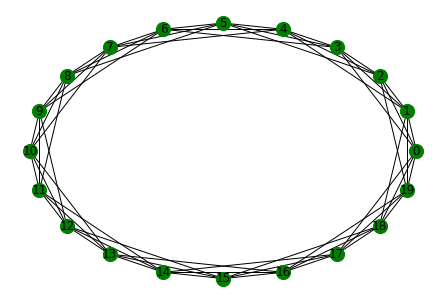

In [2]:
n = 20
k = 6
p = 0.2

G = nx.empty_graph(n, nx.Graph())
for x, y in it.combinations(np.arange(n), 2):
    if (abs(x-y) % n <= k // 2) | (abs(x-y) % n >= n - k // 2):
        G.add_edge(x, y)

nx.draw_circular(G, 
                 node_size = 200,
                 node_color = 'green',
                 with_labels = True)
plt.show()

Now we will iterate through all edges, rewiring each with probability $p$.

In [3]:
list_of_graphs = [nx.Graph.copy(G)]

node_colors = ['red'] * n
node_color_list = [node_colors]

for x in np.arange(n):
    for y in (x + np.arange(1, k // 2 + 1)) % n:
        if np.random.rand(1) < p:
            possible_nodes_to_rewire = set(G.nodes()) - set(G.neighbors(x)) - {x}
            G.remove_edge(x, y)
            G.add_edge(x, random.sample(possible_nodes_to_rewire, 1)[0])
        list_of_graphs.append(nx.Graph.copy(G))
        new_colors = node_colors.copy()
        new_colors[x] = 'yellow'
        new_colors[y] = 'yellow'
        node_color_list.append(new_colors)

def plot_func(frame):
    nx.draw_circular(list_of_graphs[int(frame)], 
                     node_color = node_color_list[int(frame)],
                     with_labels = True)
    plt.show()

interact(plot_func, frame = widgets.Play(value=0,
                                         min=0,
                                         max=n * k // 2,
                                         step=1,
                                         description="Press play",
                                         disabled=False
))

interactive(children=(Play(value=0, description='Press play', max=60), Output()), _dom_classes=('widget-intera…

<function __main__.plot_func(frame)>

Here is the final result

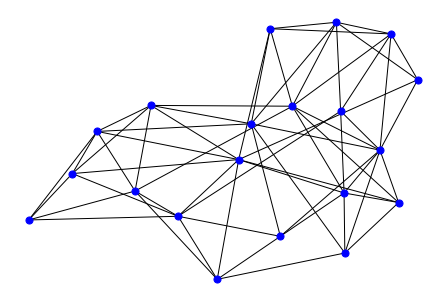

In [4]:
nx.draw(list_of_graphs[n * k  // 2], node_size = 50, node_color = 'blue')
plt.show()

### Networkx command

There is a ready function for generating a Watts-Strogatz graph in *networkx*

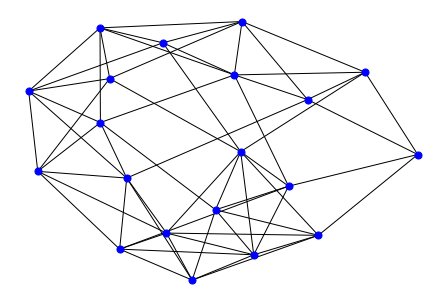

In [5]:
G = nx.watts_strogatz_graph(n, k, p)

nx.draw(G, node_size = 50, node_color = 'blue')
plt.show()

## Exercise 1

Generate directly, i.e., by a native *networkx* function, a Watts-Strogatz random graph with 500 vertices, 3000 edges, and $p=0.1$. Generate an Erdős–Rényi random graph with 500 vertices and approximately 3000 edges. Plot the two networks and compare their vertex degree histograms and average clustering coefficients.

## Solution

First, we generate the Watts-Strogatz graph. Note that if $n$ is the number of vertices and $k$ is the average degree of a vertex, then the number of edges is $|E|=\frac{nk}{2}$, i.e., we have
$$
k=\frac{2\cdot |E|}{n}=12
$$
To have some idea of the degree distribution, we will make the size of a node on the plot proportional to the vertex degree

|V| =  500
|E| =  3000


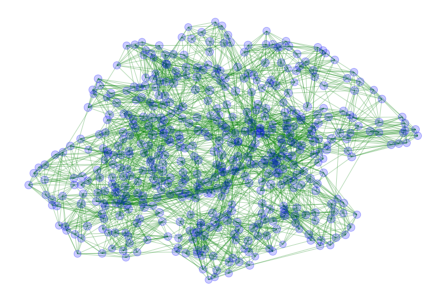

In [6]:
WS_graph = nx.watts_strogatz_graph(500, 12, 0.1)
print("|V| = ", nx.number_of_nodes(WS_graph))
print("|E| = ", nx.number_of_edges(WS_graph))
nx.draw(WS_graph, 
        node_size = [v * 5 for v in dict(nx.degree(WS_graph)).values()], 
        node_color = 'blue', alpha = 0.2, edge_color = 'green')

The clustering coefficient is

In [7]:
nx.average_clustering(WS_graph)

0.4901585548438493

Below is the histogram of vertex degrees

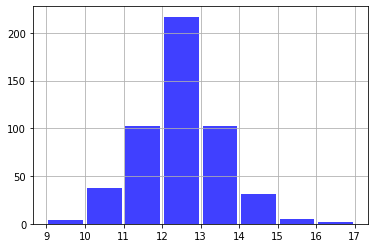

In [8]:
plt.hist(list(dict(nx.degree(WS_graph)).values()), 
         bins = np.arange(np.min(list(dict(nx.degree(WS_graph)).values())),
                          1 + np.max(list(dict(nx.degree(WS_graph)).values()))),
         facecolor='blue', alpha=0.75, rwidth = 0.9)
plt.grid(True)
plt.show()

To generate an Erdős–Rényi graph, we need to determine the parameter $p$, the fraction of pairs of vertices connected by an edge among all pairs of vertices. It is as follows

In [9]:
p = 3000 / (0.5 * 500 * (500 - 1))
print(p)

0.02404809619238477


Now let's generate the Erdős–Rényi graph

|V| =  500
|E| =  2994


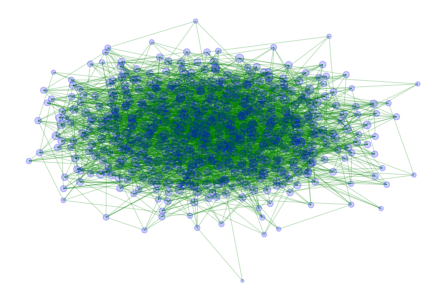

In [10]:
ER_graph = nx.erdos_renyi_graph(500, p)
print("|V| = ", nx.number_of_nodes(ER_graph))
print("|E| = ", nx.number_of_edges(ER_graph))
nx.draw(ER_graph, 
        node_size = [v * 5 for v in dict(nx.degree(ER_graph)).values()], 
        node_color = 'blue', alpha = 0.2, edge_color = 'green')

The clustering coefficient is

In [11]:
nx.average_clustering(ER_graph)

0.02513031554004095

Below is the histogram of vertex degrees

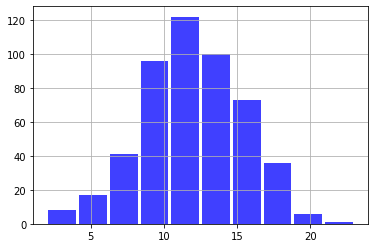

In [12]:
plt.hist(list(dict(nx.degree(ER_graph)).values()), 
         facecolor='blue', alpha=0.75, rwidth = 0.9)
plt.grid(True)
plt.show()

We see that 
1) the clustering coefficient of the Watts-Strogatz graph is much bigger than that of the Erdős–Rényi graph
2) the variance of the vertex degree of the Erdős–Rényi graph is much bigger than that of the Watts-Strogatz graph

## Exercise 2

Here, we explore the clustering coefficient of a Watts-Strogatz graph. 

### Part (a)

What is the clustering coefficient of the Watts-Strogatz graph for $p=0$ as a function of $n$ and $k$? Note that if $p=0$, then the Watts-Strogatz graph is just the ring lattice.

### Part (b)

Let's fix $n=500$ and $k=12$ and, for each $p=0, 0.01, 0.02,\cdots, 1$, generate a Watts-Strogatz graph and compute its clustering coefficient. Plot the graph of the clustering coefficient of a Watts-Strogatz graph vs $p$. You are not allowed to use explicit loops.

### Part (c)

Google the analytic expression for the clustering coefficient of a Watts-Strogatz graph. Generate and plot a Watts-Strogatz graph with 500 vertices, 3000 edges, and clustering coefficient 0.6.

## Solution

### Part (a)

A Watts-Strogatz graph is regular and hence all vertices have the same clustering coefficient. Further, each vertex is connected to $k$ vertices and hence $N(v)$ contains $\frac{k(k-1)}{2}$ pairs of vertices. Among them, 
$$
1+2+\cdots+\frac{k}{2}=\frac{1}{2}\times\frac{k}{2}\times\left(\frac{k}{2}-1\right)=\frac{k}{4}\left(\frac{k}{2}+1\right)
$$
are not connected. Therefore,
$$
1-CC=\frac{\frac{k}{4}\left(\frac{k}{2}+1\right)}{\frac{k(k-1)}{2}}=\frac{1}{4}\frac{k+2}{k-1}
$$
and
$$
CC=\frac{3(k-2)}{4(k-1)}
$$

## Part (b)

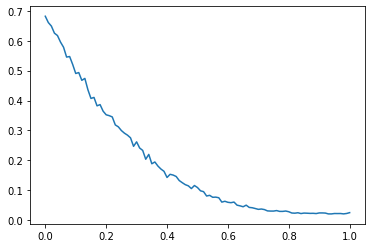

In [13]:
def ws_cc(p):
    # generates a Watts-Strogatz graph with 500 nodes, 3000 edges, and probability of rewiring p
    # returns its clustering coefficient
    G = nx.watts_strogatz_graph(500, 12, p)
    return nx.average_clustering(G)

ws_cc = np.vectorize(ws_cc)

p = np.linspace(start = 0, stop = 1, num = 101)
cc = ws_cc(p)
plt.plot(p, cc)
plt.show()

### Part (c)

The analytic expression for the clustering coefficient of Watts-Strogatz graph is, according to Wikipedia,
$$
\frac{3(k-2)}{4(k-1)}\times (1-p)^3
$$
This, in order to get the clustering coefficient of 0.6 with $n=500$ and $k=12$, we must have the following value of $p$:

In [14]:
k = 12
CC = 0.6
p = 1 - (CC * 4 * (k-1) / (3 * (k - 2))) ** (1/3)
print(p)

0.041716028587443166


Let's check it:

|V| =  500
|E| =  3000
CC =  0.5959100455100448


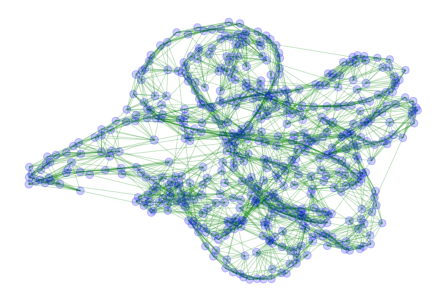

In [15]:
WS_graph = nx.watts_strogatz_graph(500, 12, p)
print("|V| = ", nx.number_of_nodes(WS_graph))
print("|E| = ", nx.number_of_edges(WS_graph))
print("CC = ", nx.average_clustering(WS_graph))
nx.draw(WS_graph, 
        node_size = [v * 5 for v in dict(nx.degree(WS_graph)).values()], 
        node_color = 'blue', alpha = 0.2, edge_color = 'green')

## Exercise 3

Load the adjacency matrix from the file "email_lab_6.txt" into Python and create a graph out of it. Like in Lab 5, this is the network of emails of some department - nodes represent employees and there is an edge whenever there was at least one email sent between the employees during the given time period. These data are collected from a different department than the data in Lab 5.

Plot the graph, find the number of vertices, the number of edges, and the clustering coefficient. Create a Watts-Strogatz network with (approximately) the same parameters. How well does the Watts-Strogatz model represent the real network?

## Solution

First, we load the graph into Python, plot it, and print its characteristics.

|V| =  89
|E| =  973
CC =  0.520092020099216


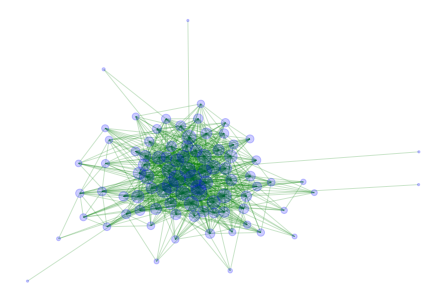

In [16]:
A = np.loadtxt("email_lab_6.txt")
G = nx.Graph(A)
CC = nx.average_clustering(G)
n = nx.number_of_nodes(G)
print('|V| = ', n)
print('|E| = ', nx.number_of_edges(G))
print('CC = ', CC)

nx.draw(G, node_size = [v * 5 for v in dict(nx.degree(G)).values()],
        node_color = 'blue', alpha = 0.2, edge_color = 'green')
plt.show()

Note that the parameter $k$ of the Watts-Strogatz network is the average vertex degree, i.e., $k=\frac{2|E|}{|V|}$. Here, we should get

In [17]:
k = 2 * nx.number_of_edges(G) / nx.number_of_nodes(G)
print(k)

21.865168539325843


However, $k$ is supposed to be a whole even number. We'll just take the closest even number to the theoretical estimate

In [18]:
k = 22

The probability of rewiring, $p$, is found from the clustering coefficient according to Exercise 2:

In [19]:
p = 1 - (CC * 4 * (k-1) / (3 * (k - 2))) ** (1/3)
print(p)

0.10035864984163734


Now we create a Watts-Strogatz network, plot it and print its characteristics

|V| =  89
|E| =  979
CC =  0.5673878703452148


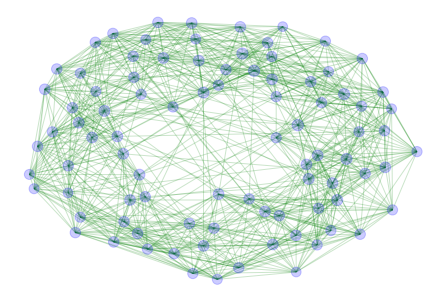

In [20]:
WS_graph = nx.watts_strogatz_graph(n, k, p)

print('|V| = ', nx.number_of_nodes(WS_graph))
print('|E| = ', nx.number_of_edges(WS_graph))
print('CC = ', nx.average_clustering(WS_graph))

nx.draw(WS_graph, node_size = [v * 5 for v in dict(nx.degree(WS_graph)).values()],
        node_color = 'blue', alpha = 0.2, edge_color = 'green')
plt.show()

It is easy to see that the variance of vertex degrees in the real network is much higher than that of the Watts-Strogatz network. Let's confirm it by looking at the histograms of vertex degrees

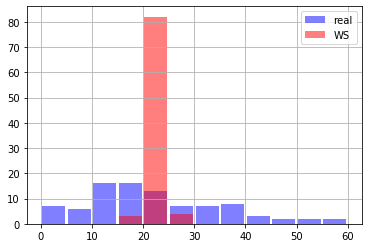

In [21]:
bins = np.linspace(0, 60, 13)

plt.hist(list(dict(nx.degree(G)).values()),
         bins, alpha = 0.5,
         facecolor='blue', 
         label = "real",
         rwidth = 0.9)

plt.hist(list(dict(nx.degree(WS_graph)).values()),
         bins, alpha = 0.5,
         facecolor='red', 
         label = "WS",
         rwidth = 0.9)

plt.grid(True)
plt.legend(loc='upper right')
plt.show()

We see that although the Watts-Strogatz model captures the clustering cofficient of a real network correctly, it fails to reflect the variance in the vertex degree.

## Exercise 4

In this and the next exercise, we will write a Python code to generate the adjacency matrix of a Watts-Strogatz network. 

First, write a Python function that takes $n$ and $k$ as input and generates the adjacency matrix of the ring lattice. For instance, below is the matrix for $n=7$ and $k=4$:
$$
A(7,4)=
\begin{bmatrix}
0 & 1 & 1 & 0 & 0 & 1 & 1 \\
1 & 0 & 1 & 1 & 0 & 0 & 1 \\
1 & 1 & 0 & 1 & 1 & 0 & 0 \\
0 & 1 & 1 & 0 & 1 & 1 & 0 \\
0 & 0 & 1 & 1 & 0 & 1 & 1 \\
1 & 0 & 0 & 1 & 1 & 0 & 1 \\
1 & 1 & 0 & 0 & 1 & 1 & 0
\end{bmatrix}
$$
Your function should not contain any loops or control statements.

This is a challenging exercise. Please feel free to ask a tutor's help and don't be discouraged if you can't do it.

## Solution

The ring lattice graph is characterized by the property that there is an edge from $i$ to $j$ whenever the distance between $i$ and $j$ is less than or equal to $k/2$. Further, the distance between $i$ and $j$ on the circle is
$$
\min(|i-j|, n - |i-j|)
$$
Thus, the adjacency matrix given by $a_{ij}=1$ whenever $i\neq j$ and $\min(|i-j|, n - |i-j|)\le k/2$. Further, note that this is equivalent to saying that $a_{ij}=1$ whenever the remainder $i-j \mod n$ belongs to the set
$$
\left\{1,2\cdots,\frac{k}{2} \right\}\cup
\left\{n-1,n-2\cdots,n-\frac{k}{2} \right\}
$$

The first step is to construct the auxillary matrix $B$ with entries $b_{ij}=|i-j|$. Here is how we can do it

In [22]:
n = 7
k = 4

B = np.arange(n).reshape(n, 1) - np.arange(n).reshape(1, n)
print(B)

[[ 0 -1 -2 -3 -4 -5 -6]
 [ 1  0 -1 -2 -3 -4 -5]
 [ 2  1  0 -1 -2 -3 -4]
 [ 3  2  1  0 -1 -2 -3]
 [ 4  3  2  1  0 -1 -2]
 [ 5  4  3  2  1  0 -1]
 [ 6  5  4  3  2  1  0]]


Then we need to get its remainder modulo $n$:

In [23]:
B = B % n
print(B)

[[0 6 5 4 3 2 1]
 [1 0 6 5 4 3 2]
 [2 1 0 6 5 4 3]
 [3 2 1 0 6 5 4]
 [4 3 2 1 0 6 5]
 [5 4 3 2 1 0 6]
 [6 5 4 3 2 1 0]]


Now let's put everything together into a function that creates the required matrix:

In [24]:
def create_circulant_matrix(n, k):
    B = (np.arange(n).reshape(n, 1) - np.arange(n).reshape(1, n)) % n
    A = 1 * (((B >= 1) & (B <= k/2)) | ((B >= n - k/2) & (B <= n-1)))
    return A

print(create_circulant_matrix(10, 6))

[[0 1 1 1 0 0 0 1 1 1]
 [1 0 1 1 1 0 0 0 1 1]
 [1 1 0 1 1 1 0 0 0 1]
 [1 1 1 0 1 1 1 0 0 0]
 [0 1 1 1 0 1 1 1 0 0]
 [0 0 1 1 1 0 1 1 1 0]
 [0 0 0 1 1 1 0 1 1 1]
 [1 0 0 0 1 1 1 0 1 1]
 [1 1 0 0 0 1 1 1 0 1]
 [1 1 1 0 0 0 1 1 1 0]]


## Exercise 5

Write a function that generates the adjacency matrix of a Watts-Strogatz network. It should start with creating the matrix of a ring lattice as in Exercise 4 and then do just one loop over all the vertices. In each loop iteration at vertex $i$, each edge from $i$ to vertices that are counter-clockwise on the circle is with probability $p$ replaced with an edge from $i$ to a random vertex chosen from all vertices that are not connected to $i$.

Note that we can't do this without an explicit loop because edge rewiring can't be applied to all vertices simultanaousely. However, one loop is enough and your function should only contain one `for` loop over all vertices and no other control statements. A template is provided below.

You will need the function `random.choice` from the library *numpy*.

## Solution

In [25]:
def generate_matrix_of_ws_network(n, k, p):
    A = create_circulant_matrix(n, k)
    for i in range(n):
        v_maybe_rewired = (i + np.arange(1, k //2 +1)) % n
        v_rewired = v_maybe_rewired[np.random.rand(k // 2) < p]
        v_maybe_rewired_to = np.where((A[i, :] == 0) & (np.arange(n) != i))[0]
        v_rewired_to = np.random.choice(v_maybe_rewired_to, len(v_rewired), replace = False)
        A[v_rewired, i] = 0 # note that we delete the old edge after we decide where it should be rewired
        A[i, v_rewired] = 0 # this may cause an erorr if 2k > n
        A[v_rewired_to, i] = 1 # if 2k > n, then deleting the old edge must be done before deciding where to rewire it
        A[i, v_rewired_to] = 1 # because then we would be able to rewire back to the same vertex
    
    return A

A = generate_matrix_of_ws_network(12, 6, 0.3)
print(A)

[[0 1 0 0 1 0 1 0 0 1 0 1]
 [1 0 1 1 0 1 0 1 0 0 1 1]
 [0 1 0 1 1 0 0 0 1 1 1 0]
 [0 1 1 0 1 1 1 0 1 0 1 0]
 [1 0 1 1 0 1 1 1 0 0 0 0]
 [0 1 0 1 1 0 1 1 1 0 0 0]
 [1 0 0 1 1 1 0 1 1 1 0 0]
 [0 1 0 0 1 1 1 0 0 1 1 0]
 [0 0 1 1 0 1 1 0 0 0 1 0]
 [1 0 1 0 0 0 1 1 0 0 1 1]
 [0 1 1 1 0 0 0 1 1 1 0 1]
 [1 1 0 0 0 0 0 0 0 1 1 0]]


Below we verify our algorithm

|V| =  500
|E| =  3000
Actual CC =  0.5004850094350088
Theoretical CC =  0.49704545454545457


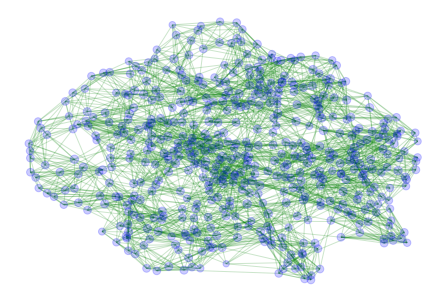

In [26]:
n, k, p = 500, 12, 0.1

A = generate_matrix_of_ws_network(500, 12, 0.1)
G = nx.Graph(A)
CC = nx.average_clustering(G)
n = nx.number_of_nodes(G)
print('|V| = ', n)
print('|E| = ', nx.number_of_edges(G))
print('Actual CC = ', CC)
print('Theoretical CC = ', 3 * (k - 2) / (4 * (k - 1)) * (1 - 0.1) ** 3)

nx.draw(G, node_size = [v * 5 for v in dict(nx.degree(G)).values()],
        node_color = 'blue', alpha = 0.2, edge_color = 'green')
plt.show()

# Conclusion

In today's lab, we covered new material on Watts-Strogatz networks. We have learned how to create Watts-Strogatz networks and what their properties are. In order to implement our own version of the algorithm generating a Watts-Strogatz network, we needed to review some material from the first weeks, such as indexing a matrix.

The main takeaway is that although the Watts-Strogatz model replicates high clustering of real social networks, it does not capture vertex degree distribution of real networks.